# This notebook is one of previous attempts to Product Category Clustering

##load the dataset and combine the needed features

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('1429_1 - Copy.csv')  # Replace with the actual path

# Extract relevant columns
df = df[['name', 'categories']].dropna()

# Preprocess categories (e.g., lowercasing and cleaning)
df['name'] = df['name'].str.lower().str.replace('[^a-z0-9\s]', '', regex=True)
df['categories'] = df['categories'].str.lower().str.replace('[^a-z0-9\s]', '', regex=True)
df['combine'] = df['categories']+' '+df['name']

# Display sample data
print(df.head())

                                                name  \
0  allnew fire hd 8 tablet 8 hd display wifi 16 g...   
1  allnew fire hd 8 tablet 8 hd display wifi 16 g...   
2  allnew fire hd 8 tablet 8 hd display wifi 16 g...   
3  allnew fire hd 8 tablet 8 hd display wifi 16 g...   
4  allnew fire hd 8 tablet 8 hd display wifi 16 g...   

                                          categories  \
0  electronicsipad  tabletsall tabletsfire tablet...   
1  electronicsipad  tabletsall tabletsfire tablet...   
2  electronicsipad  tabletsall tabletsfire tablet...   
3  electronicsipad  tabletsall tabletsfire tablet...   
4  electronicsipad  tabletsall tabletsfire tablet...   

                                             combine  
0  electronicsipad  tabletsall tabletsfire tablet...  
1  electronicsipad  tabletsall tabletsfire tablet...  
2  electronicsipad  tabletsall tabletsfire tablet...  
3  electronicsipad  tabletsall tabletsfire tablet...  
4  electronicsipad  tabletsall tabletsfire tablet..

##Apply the emdedding using Sentence Transformer model 'paraphrase-MiniLM-L3-v2'

In [ ]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained model
model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L3-v2')

# Generate embeddings for categories
category_embeddings = model.encode(df['combine'].unique().tolist())

##Start clustring using k-means method

In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters (meta-categories)
num_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(category_embeddings)

# Map unique categories to their clusters
unique_categories = df['combine'].unique()
category_to_cluster = {category: cluster for category, cluster in zip(unique_categories, clusters)}

In [ ]:
# Map to meta-categories in the original dataset
df['MetaCategory'] = df['combine'].map(category_to_cluster)

# Display the updated dataset
print(df[['combine', 'MetaCategory']].head())

                                             combine  MetaCategory
0  electronicsipad  tabletsall tabletsfire tablet...             2
1  electronicsipad  tabletsall tabletsfire tablet...             2
2  electronicsipad  tabletsall tabletsfire tablet...             2
3  electronicsipad  tabletsall tabletsfire tablet...             2
4  electronicsipad  tabletsall tabletsfire tablet...             2


## Assign clusters to meta-category and Name it

In [ ]:
# Group categories by cluster
cluster_to_categories = {}
for category, cluster in category_to_cluster.items():
    if cluster not in cluster_to_categories:
        cluster_to_categories[cluster] = []
    cluster_to_categories[cluster].append(category)

# Display sample categories for each cluster
for cluster_id, categories_in_cluster in cluster_to_categories.items():
    print(f"\nCluster {cluster_id}:")
    print(categories_in_cluster[:10])  # Display first 10 categories in the cluster

# Assign meaningful meta-category names
meta_categories = {
    0: "Electronics & Gadgets",
    1: "Home & Kitchen",
    2: "Health & Personal Care",
    3: "Toys & Games",
    4: "Books & Media"
}

# Map clusters to meta-category names
df['MetaCategoryName'] = df['MetaCategory'].map(meta_categories)

# Display the final dataset
print(df[['combine', 'MetaCategoryName']].head())


Cluster 2:
['electronicsipad  tabletsall tabletsfire tabletstabletscomputers  tablets allnew fire hd 8 tablet 8 hd display wifi 16 gb  includes special offers magenta', 'tabletsfire tabletselectronicscomputerscomputer componentshard drives  storagecomputers  tabletsall tablets allnew fire hd 8 tablet 8 hd display wifi 32 gb  includes special offers magenta', 'tabletsfire tabletselectronicscomputerscomputer componentshard drives  storagecomputers  tabletsall tablets fire hd 8 tablet with alexa 8 hd display 32 gb tangerine  with special offers', 'tabletsfire tabletscomputers  tabletsall tablets fire hd 8 tablet with alexa 8 hd display 32 gb tangerine  with special offers', 'electronicsipad  tabletsall tabletscomputerstablets  networkingtablets  ebook readerscomputers  tabletsereaders  accessoriesereadersusedcomputers accessoriesusedtabletscomputersipads tabletskindle ereaderselectronics features fire tablet 7 display wifi 8 gb  includes special offers magenta', 'computerstablets  networ

In [ ]:
df.head(100)

,name,categories,combine,MetaCategory,MetaCategoryName
0,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care
1,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care
2,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care
3,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care
4,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care
...,...,...,...,...,...
95,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care
96,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care
97,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care
98,allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsall tabletsfire tablet...,electronicsipad tabletsall tabletsfire tablet...,2,Health & Personal Care


## evaluation matrics

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(category_embeddings, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(category_embeddings, clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.30
Davies-Bouldin Index: 1.48


In [ ]:
# Count reviews per meta-category
meta_category_distribution = df['MetaCategoryName'].value_counts()

# Display the distribution
print(meta_category_distribution)

MetaCategoryName
Health & Personal Care    17592
Home & Kitchen             5948
Toys & Games               3756
Electronics & Gadgets       596
Books & Media                 8
Name: count, dtype: int64


<ipython-input-26-b10b1265f7d2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meta_category_distribution.index, y=meta_category_distribution.values, palette="viridis")


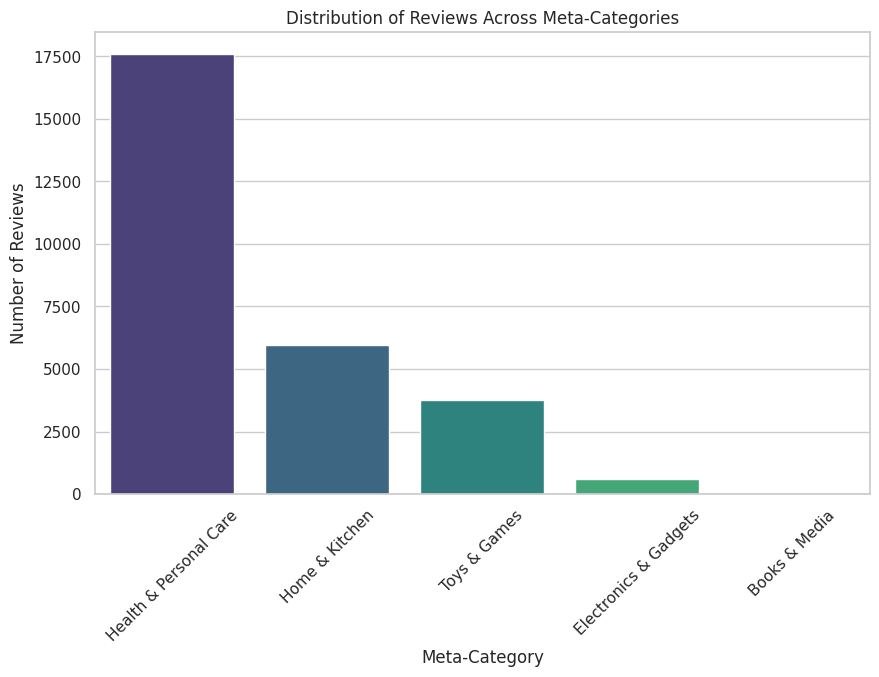

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=meta_category_distribution.index, y=meta_category_distribution.values, palette="viridis")
plt.title("Distribution of Reviews Across Meta-Categories")
plt.xlabel("Meta-Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

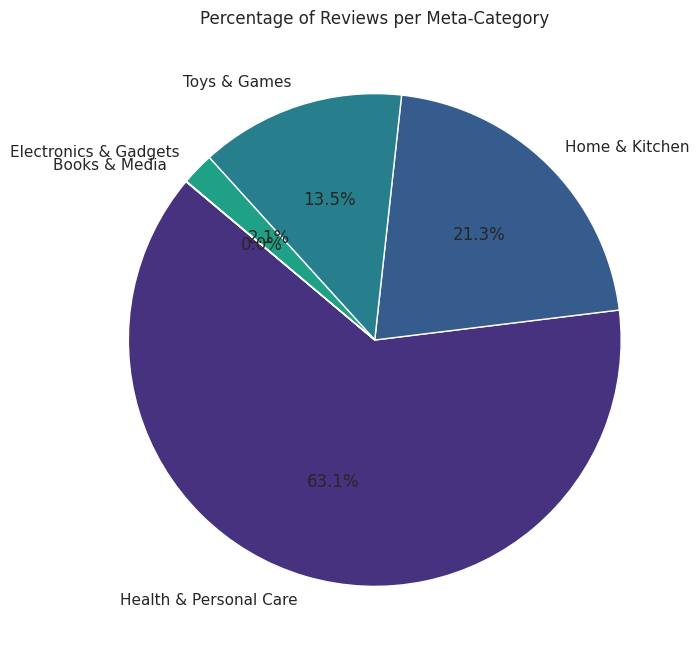

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(meta_category_distribution, labels=meta_category_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Percentage of Reviews per Meta-Category")
plt.show()